In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lidar = pd.read_csv('../data/f5_shelf_fw/lidar.txt', sep=' ', header=None)
actions = pd.read_csv('../data/f5_shelf_fw/actions.txt', sep=' ', header=None)
actions.columns= ['steering_angle', 'velocity']
print("actions ", actions.shape)
print("Lidar ",lidar.shape)


FileNotFoundError: [Errno 2] File ../data/f5_shelf_fw_harald/lidar.txt does not exist: '../data/f5_shelf_fw_harald/lidar.txt'

In [41]:
def plot_vel():
    #fig, ax = plt.subplots(figsize=(16,10))
    sns.lineplot(data=actions['steering_angle'])

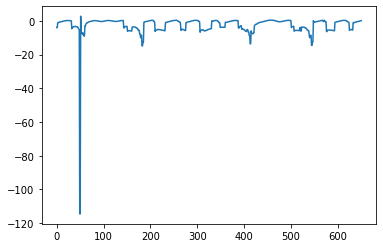

In [38]:
plot_vel()

actions  (651, 2)
Lidar  (651, 1081)


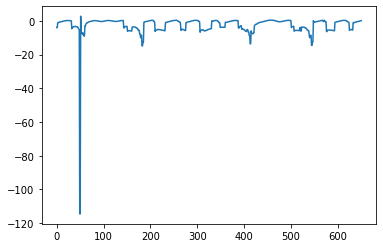

In [29]:
negative_vel = actions.loc[actions['velocity'] <= 0.0]
actions = actions.drop(negative_vel.index)
lidar = lidar.drop(negative_vel.index)
print("actions ", actions.shape)
print("Lidar ",lidar.shape)
plot_vel()

In [30]:
def write_output_to_csv():
    output = lidar.copy()
    output['velocity'] = actions['velocity'].copy()
    output['steering_angle'] = actions['steering_angle'].copy()
    output.to_csv(r'../data/Dataset_refined/f5_shelf_fw.csv', index=False, header=True)

In [31]:
write_output_to_csv()

In [42]:
#Combine all bags
dataset = pd.read_csv('../data/Dataset_refined/complete.csv', sep=',')
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/f5_nobox_fg.csv', sep=','))
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/f5_nobox_fg1.csv', sep=','))
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/f5_shelf_fg.csv', sep=','))
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/f5_shelf_fg1.csv', sep=','))
dataset = dataset.append(pd.read_csv('../data/Dataset_refined/f5_shelf_fw.csv', sep=','))


In [43]:
dataset.to_csv(r'../data/Dataset_refined/latest_complete.csv', index=False, header=True)

In [32]:
complete = pd.read_csv('../data/Dataset_refined/f5_shelf_fw.csv', sep=',')

In [33]:
complete['steering_angle'].shape

(651,)

In [34]:
#clip impossible turns (wrong with follow the wall...)
for i in range(len(complete)):
    if complete['steering_angle'][i] > 0.4189:
        complete['steering_angle'][i] = 0.4189
    elif complete['steering_angle'][i] < -0.4189:
        complete['steering_angle'][i] = -0.4189

In [35]:
complete.to_csv(r'../data/Dataset_refined/f5_shelf_fw.csv', index=False, header=True)

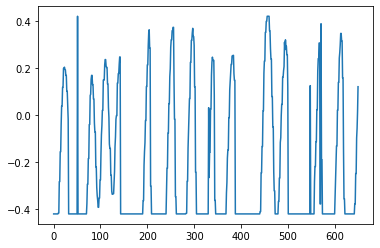

In [39]:
sns.lineplot(data=complete['steering_angle'])